In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline





In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/diamonds/diamonds.csv


In [3]:
data = pd.read_csv('../input/diamonds/diamonds.csv')

In [4]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.columns = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'length', 'width', 'height']
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'length',
       'width', 'height'],
      dtype='object')

In [6]:
data.shape

(53940, 10)

In [7]:
data.head()

,carat,cut,color,clarity,depth,table,price,length,width,height
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Data Preprocessing

In [8]:

data.columns = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'length', 'width', 'height']
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'length',
       'width', 'height'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   length   53940 non-null  float64
 8   width    53940 non-null  float64
 9   height   53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
data.describe(include='all')

,carat,cut,color,clarity,depth,table,price,length,width,height
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [11]:
data = data.drop(data[data["length"]==0].index)
data = data.drop(data[data["width"]==0].index)
data = data.drop(data[data["height"]==0].index)
data.shape

(53920, 10)

In [12]:
sns.set_palette('coolwarm')

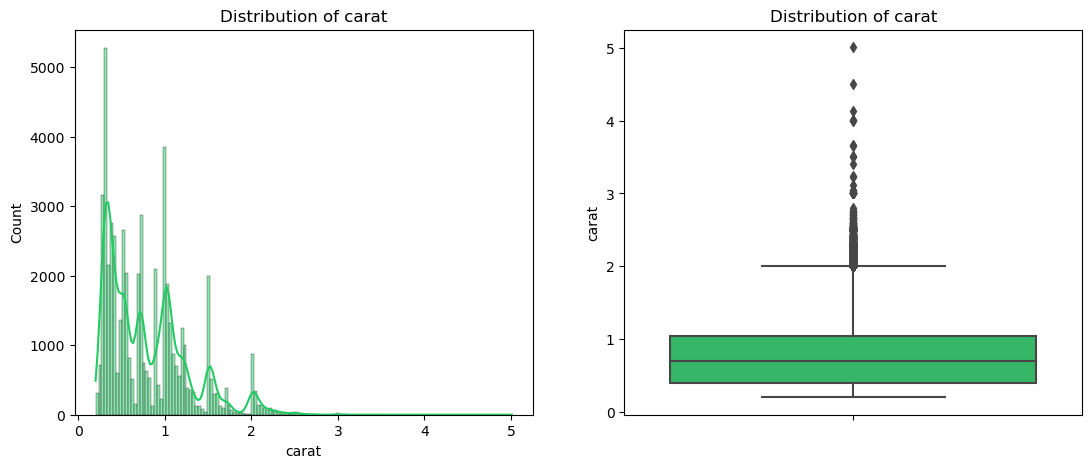

In [13]:
fig, ax = plt.subplots(1,2, figsize=(13,5))
sns.histplot(data['carat'], kde=True, ax=ax[0], color='#21cc62')
ax[0].set_title('Distribution of carat')
sns.boxplot(y=data['carat'], ax=ax[1], color='#21cc62')
ax[1].set_title('Distribution of carat')
plt.show()

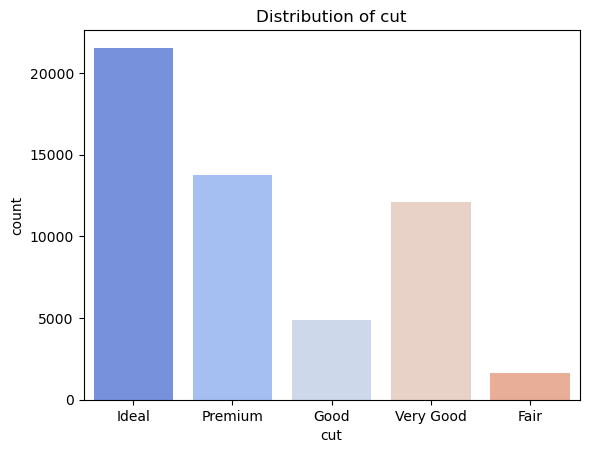

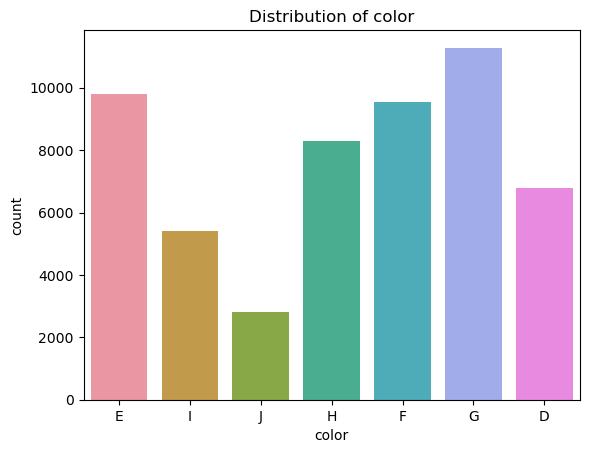

In [14]:
fig = sns.countplot(x=data['cut'])
plt.title('Distribution of cut')
plt.show()

fig = sns.countplot(x=data['color'])
plt.title('Distribution of color')
plt.show()

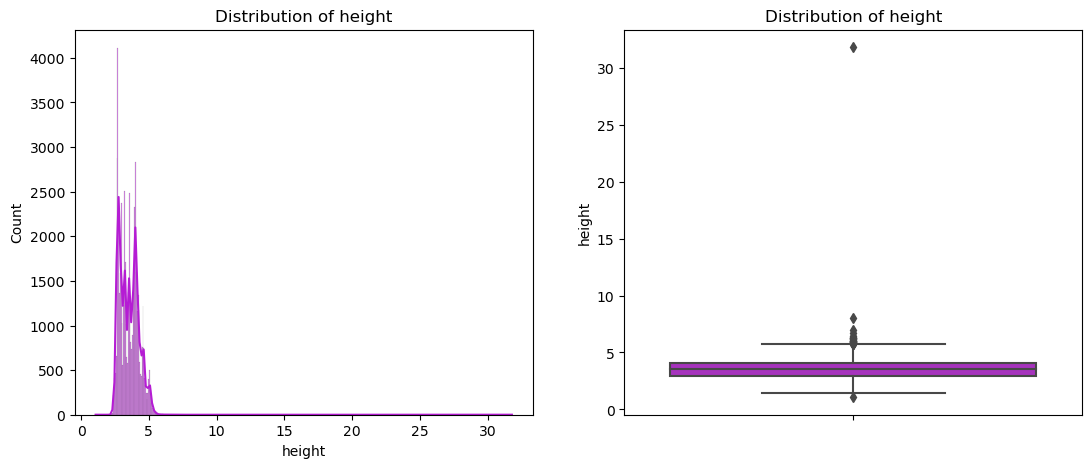

In [15]:
fig, ax = plt.subplots(1,2, figsize=(13,5))
sns.histplot(data['height'], kde=True, ax=ax[0], color='#b51cd4')
ax[0].set_title('Distribution of height')
sns.boxplot(y=data['height'], ax=ax[1], color='#b51cd4')
ax[1].set_title('Distribution of height')
plt.show()

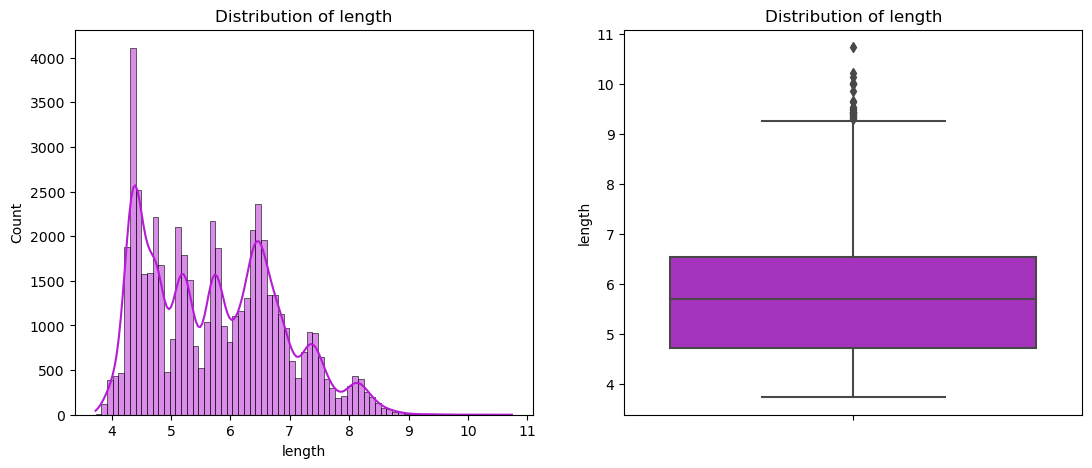

In [16]:
fig, ax = plt.subplots(1,2, figsize=(13,5))
sns.histplot(data['length'], kde=True, ax=ax[0], color='#b51cd4')
ax[0].set_title('Distribution of length')
sns.boxplot(y=data['length'], ax=ax[1], color='#b51cd4')
ax[1].set_title('Distribution of length')
plt.show()

* There are clearly outliers to be seen depth, table, length, width and height columns.

In [17]:
outlier_cols = ['depth', 'table', 'length', 'width', 'height']

In [18]:
total_outliers = 0

for col in outlier_cols:  
    print(f'\nColumn Name: {col}')
    
    Q1 = np.percentile(data[col], 25, interpolation = 'midpoint')
    Q3 = np.percentile(data[col], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1

    print(f'Q1: {Q1} | Q2: {Q3} | IQR: {IQR}')
    
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR
    print(f'upper bound: {upper_bound}')
    print(f'lower bound: {lower_bound}')

    # Upper bound
    upper = data[data[col] >= upper_bound]
    # Lower bound
    lower = data[data[col] <= lower_bound]
    
    
   
    no_of_outliers = len(upper) + len(lower)
    print(f"Outliers Count :  {no_of_outliers}\n")
    total_outliers += no_of_outliers
    
    # Remove Outlier
    data = data[(data[col]<upper_bound) & (data[col]>lower_bound)]

    print(f'{no_of_outliers} Outliers removed from {col} column.\n')
    
    print(f'\n\nTotal outliers removed are {total_outliers}.')


Column Name: depth
Q1: 61.0 | Q2: 62.5 | IQR: 1.5
upper bound: 64.75
lower bound: 58.75
Outliers Count :  2543

2543 Outliers removed from depth column.



Total outliers removed are 2543.

Column Name: table
Q1: 56.0 | Q2: 59.0 | IQR: 3.0
upper bound: 63.5
lower bound: 51.5
Outliers Count :  387

387 Outliers removed from table column.



Total outliers removed are 2930.

Column Name: length
Q1: 4.69 | Q2: 6.53 | IQR: 1.8399999999999999
upper bound: 9.29
lower bound: 1.9300000000000006
Outliers Count :  15

15 Outliers removed from length column.



Total outliers removed are 2945.

Column Name: width
Q1: 4.7 | Q2: 6.52 | IQR: 1.8199999999999994
upper bound: 9.249999999999998
lower bound: 1.970000000000001
Outliers Count :  3

3 Outliers removed from width column.



Total outliers removed are 2948.

Column Name: height
Q1: 2.89 | Q2: 4.03 | IQR: 1.1400000000000001
upper bound: 5.74
lower bound: 1.18
Outliers Count :  6

6 Outliers removed from height column.



Total outliers remove

In [19]:
#data shape
data.shape

(50966, 10)

In [20]:
from sklearn.preprocessing import LabelEncoder
import pickle

label_data = data.copy()

cut_label_encoder = LabelEncoder()
label_data['cut'] = cut_label_encoder.fit_transform(label_data['cut'])
cut_encoder = open('cut_encoder.pkl', 'wb')
pickle.dump(cut_label_encoder, cut_encoder)
cut_encoder.close()

color_label_encoder = LabelEncoder()
label_data['color'] = color_label_encoder.fit_transform(label_data['color'])
color_encoder = open('color_encoder.pkl', 'wb')
pickle.dump(color_label_encoder, color_encoder)
color_encoder.close()

clarity_label_encoder = LabelEncoder()
label_data['clarity'] = clarity_label_encoder.fit_transform(label_data['clarity'])

clarity_encoder = open('clarity_encoder.pkl', 'wb')
pickle.dump(clarity_label_encoder, clarity_encoder)
clarity_encoder.close()
label_data.head()


,carat,cut,color,clarity,depth,table,price,length,width,height
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48


# Splitting the Data

In [21]:
X = label_data.drop('price', axis=1)
y = label_data['price']

Linear Regression


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [24]:
models = {'model_name':[], 'model':[], 'cv_score':[], 'accuracy':[]}


In [25]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
#training
linear_regression.fit(X_train, y_train)
#prediction
predict_y = linear_regression.predict(X_test)


#model cross validation score (negative root mean squared error)
cv_score = cross_val_score(linear_regression, X_train, y_train, scoring='neg_root_mean_squared_error', cv=15).mean()

#model accuracy on test data
accuracy = round(r2_score(y_test, predict_y)*100,2)


models['model_name'].append('Linear Regression')
models['model'].append(linear_regression)
models['model'].append(linear_regression)
models['cv_score'].append(-cv_score)
models['accuracy'].append(accuracy)

print('Model: Linear Regression')
print('Cross Validation Score: ', -cv_score)
print('Accuracy', accuracy)

Model: Linear Regression
Cross Validation Score:  1278.9734533600092
Accuracy 89.57


Decision Tree Regressor 

In [26]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regression = DecisionTreeRegressor()
decision_tree_regression.fit(X_train, y_train)

predict_y = decision_tree_regression.predict(X_test)
cv_score = cross_val_score(decision_tree_regression, X_train, y_train, scoring='neg_root_mean_squared_error', cv=15).mean()
accuracy = round(r2_score(y_test, predict_y)*100,2)


models['model_name'].append('Decision Tree Regression')
models['model'].append(decision_tree_regression)
models['cv_score'].append(-cv_score)
models['accuracy'].append(accuracy)

print('Model: Desision Tree Regression')
print('Cross Validation Score: ', -cv_score)
print('Accuracy', accuracy)


Model: Desision Tree Regression
Cross Validation Score:  755.3426736953596
Accuracy 96.74


SVM

Random Forest Regressor 

In [27]:
from sklearn.svm import SVR
#model
support_vector_regression = SVR()
#training
support_vector_regression.fit(X_train, y_train)
#prediction
predict_y = support_vector_regression.predict(X_test)

#model cross validation score (negative root mean squared error)
cv_score = cross_val_score(support_vector_regression, X_train, y_train, scoring='neg_root_mean_squared_error', cv=15).mean()

#model accuracy on test data
accuracy = round(r2_score(y_test, predict_y)*100,2)


models['model_name'].append('Support Vector Regression')
models['model'].append(support_vector_regression)
models['cv_score'].append(-cv_score)
models['accuracy'].append(accuracy)
print('Model: Support Vector Regression')
print('Cross Validation Score: ', -cv_score)
print('Accuracy', accuracy)


Model: Support Vector Regression
Cross Validation Score:  4258.150267999146
Accuracy -12.64


Grading Boost Regressor 

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
#model
gradient_boosting_regression = GradientBoostingRegressor()
#training
gradient_boosting_regression.fit(X_train, y_train)
#prediction
predict_y = gradient_boosting_regression.predict(X_test)

#model cross validation score (negative root mean squared error)
cv_score = cross_val_score(gradient_boosting_regression, X_train, y_train, scoring='neg_root_mean_squared_error', cv=15).mean()

#model accuracy on test data
accuracy = round(r2_score(y_test, predict_y)*100,2)


models['model_name'].append('Gradient Boosting Regression')
models['model'].append(gradient_boosting_regression)
models['cv_score'].append(-cv_score)
models['accuracy'].append(accuracy)



print('Model: Gradient Boosting Regression')
print('Cross Validation Score: ', -cv_score)
print('Accuracy', accuracy)



Model: Gradient Boosting Regression
Cross Validation Score:  655.7200972335528
Accuracy 97.39


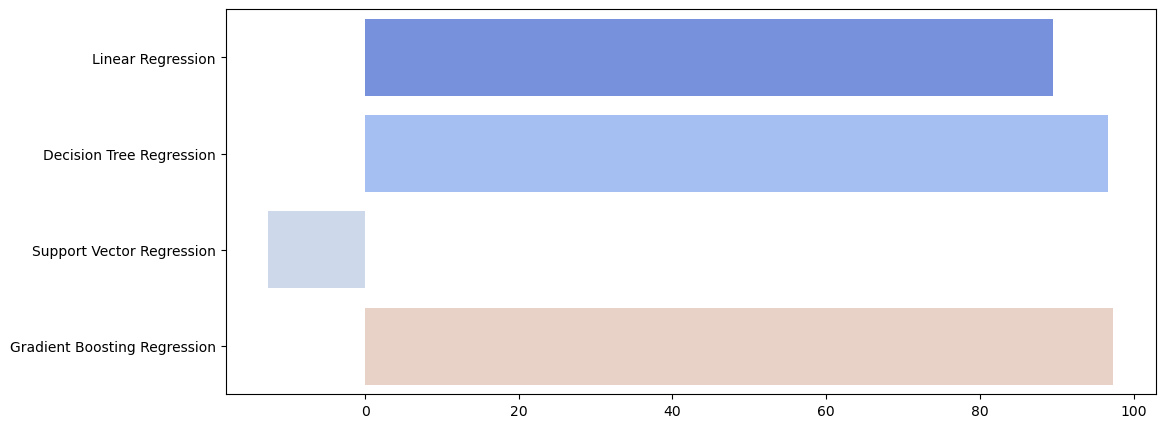

In [29]:
fig = plt.figure(figsize=(12,5))
plots = sns.barplot(y=models['model_name'], x=models['accuracy'])

In [30]:
def predict_output(input_val):
    
    output_val = []
    
    pkl_file = open('cut_encoder.pkl', 'rb')
    cut_input_encoder = pickle.load(pkl_file) 
    pkl_file.close()

    pkl_file = open('color_encoder.pkl', 'rb')
    color_input_encoder = pickle.load(pkl_file) 
    pkl_file.close()

    pkl_file = open('clarity_encoder.pkl', 'rb')
    clarity_input_encoder = pickle.load(pkl_file) 
    pkl_file.close()

    input_val[1] = cut_input_encoder.transform([input_val[1]])[0]
    input_val[2] = color_input_encoder.transform([input_val[2]])[0] 
    input_val[3] = clarity_input_encoder.transform([input_val[3]])[0]
    
    for output_model_name,output_model in zip(models['model_name'],models['model']):
        output_prediction = round(output_model.predict([input_val])[0],2)
        print(f'{output_model_name} : {output_prediction}')
        output_val.append(output_prediction)

    fig = plt.figure(figsize=(12,5))
    plots = sns.barplot(y=models['model_name'], x=output_val)

Linear Regression : 33738.89
Decision Tree Regression : 33738.89
Support Vector Regression : 4216.0
Gradient Boosting Regression : 2871.51


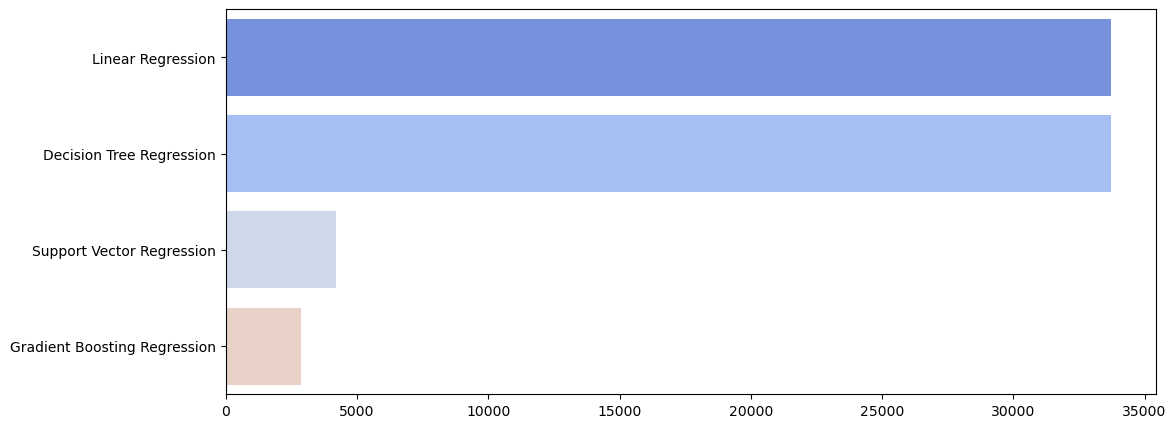

In [31]:
input_val = [0.5, 'Fair', 'D', 'IF', 62.9, 56.8, 7.8, 45.8, 26.8]
    
predict_output(input_val)
